# **Time Series Forecasting - Univariate with Exogenous Variables**

# **statsmodels libray**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving TSLA_cleaned_v2.csv to TSLA_cleaned_v2.csv


In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [3]:

tsla_data = pd.read_csv('TSLA_cleaned_v2.csv')

# Set the 'Date' column as the index and sort the data
tsla_data['Date'] = pd.to_datetime(tsla_data['Date'])
tsla_data.set_index('Date', inplace=True)
tsla_data.sort_index(inplace=True)


In [4]:
# Split the data into training and testing sets (80-20 split)
train_size = int(len(tsla_data) * 0.8)
train_data = tsla_data.iloc[:train_size]
test_data = tsla_data.iloc[train_size:]


# **Train AMIRAX**

In [ ]:
# Define the target and exogenous variables
y_train = train_data['Close']
exog_train = train_data[['Open', 'High', 'Low', 'Volume']]

# Fit the ARIMAX model
model = sm.tsa.ARIMA(endog=y_train, exog=exog_train, order=(1,1,1))
fit_model = model.fit()


# **Predict**

In [ ]:
# Define the exogenous variables for the test set
exog_test = test_data[['Open', 'High', 'Low', 'Volume']]

# Generate forecasts
forecast = fit_model.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=exog_test, dynamic=True)

# Align the forecasts with the original dates
forecast_comparison = pd.DataFrame({'Actual': test_data['Close'].values, 'Forecast': forecast.values}, index=test_data.index)


# **Evaluate**

In [7]:
# Calculate evaluation metrics
mae = mean_absolute_error(forecast_comparison['Actual'], forecast_comparison['Forecast'])
mse = mean_squared_error(forecast_comparison['Actual'], forecast_comparison['Forecast'])
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 69.07306498310386
Mean Squared Error: 6911.482155585467
Root Mean Squared Error: 83.1353243548461


# **Visualize**

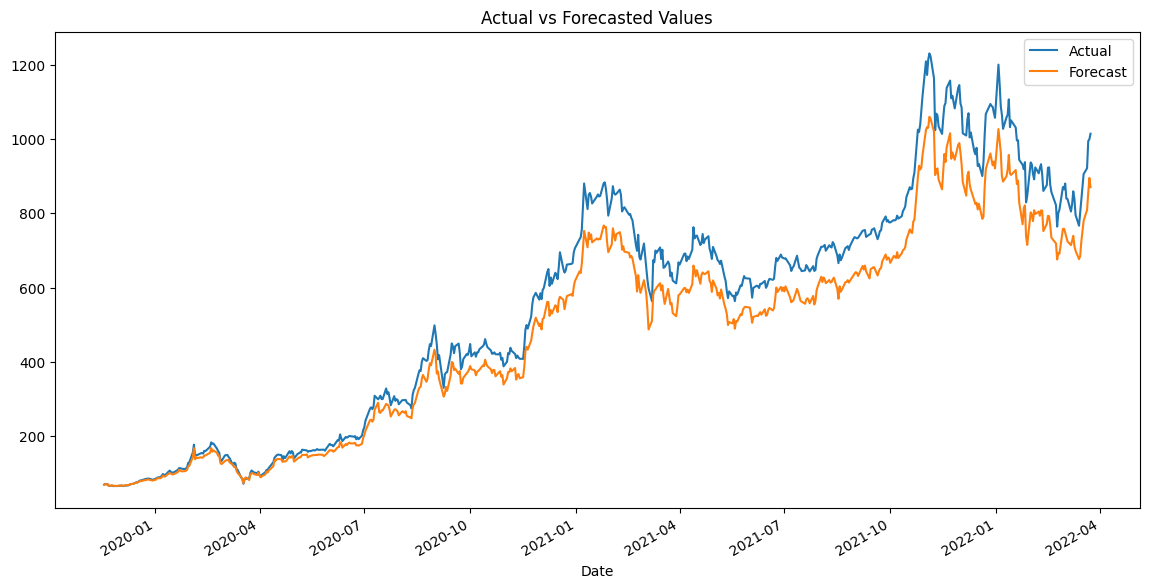

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
forecast_comparison['Actual'].plot(label='Actual')
forecast_comparison['Forecast'].plot(label='Forecast')
plt.title('Actual vs Forecasted Values')
plt.legend()
plt.show()
